<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Ответьте-на-вопрос-и-обоснуйте-решение." data-toc-modified-id="Ответьте-на-вопрос-и-обоснуйте-решение.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответьте на вопрос и обоснуйте решение.</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.  
Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
df.duplicated().sum()

153

In [6]:
df = df.drop_duplicates().copy()

In [7]:
df.shape

(4847, 5)

<AxesSubplot:>

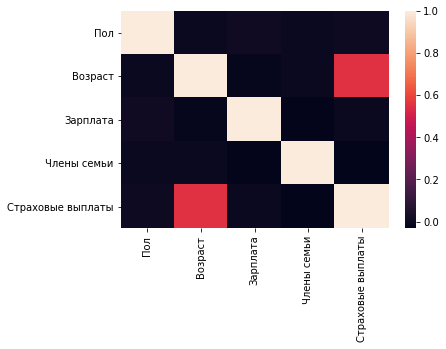

In [8]:
heatmap(df.corr(method = 'spearman'))

<function matplotlib.pyplot.show(close=None, block=None)>

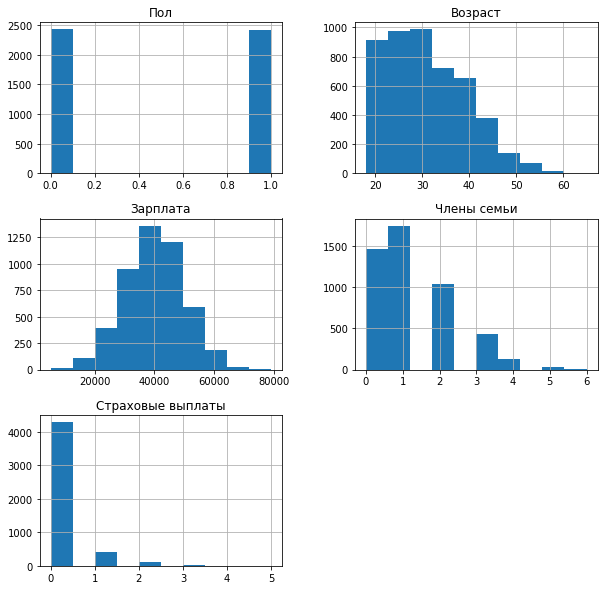

In [9]:
df.hist(figsize=(10,10))
plt.show

**По итогу анализа данных посмотрели на:**
* наличие пропусков
> нет
* наличие дубликатов 
> удалены 153
* распределение данных
> выбросов нет, распределения выглядят логично
* корреляцию признаков
> замечена корреляция между возрастом и количеством страховых выплат

## Умножение матриц

In [10]:
df_features = df.drop('Страховые выплаты', axis=1)
df_target = df['Страховые выплаты']


In [11]:
np.random.seed(555)
code = np.random.random([df_features.shape[1], df_features.shape[1]])
code

array([[0.71783409, 0.04785513, 0.94447198, 0.68638004],
       [0.58120733, 0.14267862, 0.94591918, 0.33999059],
       [0.62043546, 0.45295964, 0.23976742, 0.03450459],
       [0.14859311, 0.81086617, 0.65310538, 0.54446869]])

In [12]:
code_reverse = np.linalg.inv(code)

In [13]:
code.shape, code_reverse.shape

((4, 4), (4, 4))

In [14]:
features_coded = pd.DataFrame(df_features.values@code, columns=df_features.columns)
features_coded.shape, df_features.shape, df_target.shape

((4847, 4), (4847, 4), (4847,))

In [15]:
model = LinearRegression()
model.fit(df_features, df_target)
r2_score(df_target, model.predict(df_features))

0.4302010044852066

In [16]:
model = LinearRegression()
model.fit(features_coded, df_target)
r2_score(df_target, model.predict(features_coded))

0.4302010044852125

## Ответьте на вопрос и обоснуйте решение. 
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
 a. Изменится. Приведите примеры матриц.  
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

$$
a = Xw
$$
$$
a' = (XP)w'
$$
$$
w = (X^T X)^{-1} X^T y
$$
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
a = X(X^T X)^{-1} X^T y
$$
$$
a' = (XP)((XP)^T XP)^{-1} (XP)^T y
$$
$$
a == a' ?
$$
$$
X(X^T X)^{-1} X^T y == (XP)((XP)^T XP)^{-1} (XP)^T y
$$
$$
(XP)(P^T(X^TX)P)^{-1}P^TX^T y = X(PP^{-1})(X^TX)^{-1}((P^T)^{-1}P^T)X^T y
$$
$$
PP^{-1} = E, (P^T)^{-1}P^T = E
$$
$$
X(X^TX)^{-1}X^T y = X(X^TX)^{-1}X^T y
$$
$$
a = a'
$$


Равенство предсказаний, полученных по матрице признаков и такой же матрице, умноженной на случайную квадратную матрицу равной ширины доказано



## Алгоритм преобразования

1. Сгенерировать случайную квадратную матрицу со стороной, равной кол-ву признаков  
2. Проверить матрицу на обратимость
3. Умножить матрицу признаков на случайную матрицу (закодировать)
4. Обучить модель Линейной Регрессии на изначальных данных
5. Получить предсказание от модели
5. Измерить успешность предсказания подходящей метрикой (R2)
5. Обучить вторую модель Линейной Регрессии на кодированных данных
5. Получить предсказание от второй модели
5. Измерить успешность предсказания подходящей метрикой (R2)
5. Сравнить два показателя метрики

## Проверка алгоритма

In [22]:
def enigma(features, random_state):
    np.random.seed(random_state)
    code = np.random.random([features.shape[1], features.shape[1]])
    code_reverse = np.linalg.inv(code)
    feat = features.copy()
    features_coded = features @ code 
    s = list(features.columns)
    features_coded.columns = feat.columns
    return features_coded, code_reverse  

In [23]:
enigma(df_features, 555)

(               Пол       Возраст      Зарплата  Члены семьи
 0     30798.294653  22473.506908  11932.844276  1726.598172
 1     23603.431541  17219.840571   9155.327333  1327.358491
 2     13045.999634   9516.290213   5062.547468   734.456136
 3     25884.661146  18893.035156  10019.471911  1447.070181
 4     16210.357098  11826.289576   6285.359861   910.775939
 ...            ...           ...           ...          ...
 4995  22166.116848  16176.276040   8587.488828  1242.422570
 4996  32530.727650  23740.747307  12596.627145  1820.144713
 4997  21044.683365  15359.807251   8148.340119  1177.594381
 4998  20302.189657  14817.399756   7864.108631  1138.099702
 4999  25206.819834  18395.015286   9762.640550  1411.636977
 
 [4847 rows x 4 columns],
 array([[ 0.87826839, -0.73722243,  1.46336309, -0.73956495],
        [-0.70661156, -0.09514177,  0.68956082,  0.90649541],
        [-1.27474949,  2.46328984, -0.86224668,  0.12345745],
        [ 2.34174812, -2.61189386, -0.39203225,  0.540

In [24]:
features_coded

,Пол,Возраст,Зарплата,Члены семьи
0,30798.294653,22473.506908,11932.844276,1726.598172
1,23603.431541,17219.840571,9155.327333,1327.358491
2,13045.999634,9516.290213,5062.547468,734.456136
3,25884.661146,18893.035156,10019.471911,1447.070181
4,16210.357098,11826.289576,6285.359861,910.775939
...,...,...,...,...
4842,22166.116848,16176.276040,8587.488828,1242.422570
4843,32530.727650,23740.747307,12596.627145,1820.144713
4844,21044.683365,15359.807251,8148.340119,1177.594381
4845,20302.189657,14817.399756,7864.108631,1138.099702


In [25]:
model = LinearRegression()
model.fit(enigma(df_features, 555)[0], df_target)
r2_score(df_target, model.predict(enigma(df_features, 555)[0]))

0.4302010044852125

In [30]:
features_decoded = (features_coded.values @ code_reverse).astype(int)

In [27]:
model = LinearRegression()
model.fit(features_decoded, df_target)
r2_score(df_target, model.predict(features_decoded))

0.43020100448520937

In [28]:
df_features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


In [31]:
pd.DataFrame(features_decoded, columns=df_features.columns)

,Пол,Возраст,Зарплата,Члены семьи
0,1,40,49599,1
1,0,45,37999,1
2,0,28,20999,0
3,0,20,41699,1
4,1,27,26099,0
...,...,...,...,...
4842,0,27,35699,2
4843,0,33,52399,1
4844,0,19,33899,2
4845,1,21,32699,3


## Общий вывод

**В ходе выполнения проекта были проведены следующие шаги:**

1. Получение данных
2. Анализ
3. Создание алгоритма защиты данных
4. Проверка алгоритма:

>1. Сгенерировать случайную квадратную матрицу со стороной, равной кол-ву признаков  
2. Проверить матрицу на обратимость
3. Умножить матрицу признаков на случайную матрицу (закодировать)
4. Обучить модель Линейной Регрессии на изначальных данных
5. Получить предсказание от модели
5. Измерить успешность предсказания подходящей метрикой (R2)
5. Обучить вторую модель Линейной Регрессии на кодированных данных
5. Получить предсказание от второй модели
5. Измерить успешность предсказания подходящей метрикой (R2)
>5. Сравнить два показателя метрики

5. Раскодирование данных
6. Общий вывод

**Модели показали одинаковые результаты по потерям при обучении на данных до, после кодирования, а также после раскодирования.
Предложенный способ умножения матрицы признаков на определенную обратимую матрицу показал себя надежным способом шифрования личных данных**